### Neshyba 2023


# Oxygenated Graphene


## When a Hamiltonian is not separable

The molecule shown in Fig. 1, which we're calling "oxygraphene," is planar. We could say that a delocalized $\pi$-type electron on that plane would have two degrees of freedom: motion in the x-direction, and motion in the y-direction. But unlike real graphene, this molecule has an oxygen in the corner, that will tend to attract those electrons a bit more than the carbons would. And that being so, we're going to have to think about a concept called *separability*, which is all about how separable, or independent, motion in those two directions is.

<p style='text-align: center;'>
<img src="http://webspace.pugetsound.edu/facultypages/nesh/Notebook/Oxographene.jpg" height="500" width="500"/>
<p style='text-align: center;'>
<strong>Figure 1</strong>. Oxygraphene, an oxidized form of graphene.
</p>

Separability is easiest to think about (I think) as it pertains to kinetic energy. For example, you can probably convince yourself without too much trouble that a particle moving in two Cartesian directions will have distinct kinetic energies in those two directions. We can express this idea formally, in classical mechanical terms, as

$$
KE = {1 \over 2m}(p_x^2 + p_y^2)  \ \ \ \ (1)
$$

or in quantum mechanical terms as 

$$
KE = -{\hbar^2 \over 2m} \big ( \nabla^2_x +  \nabla^2_y \big )  \ \ \ \ (2)
$$

The kinetic energy is said to *separate*. Excellent.

And the potential energy? Figure 1 below shows what we mean by non-separability: this function cannot be expressed as $PE_x(x) + PE_y(y)$.

<p style='text-align: center;'>
<img src="http://webspace.pugetsound.edu/facultypages/nesh/Notebook/Nonseparable Potential Energy.jpg" height="500" width="500"/>
<strong>Figure 2</strong>. A non-separable function representing the potential energy experienced by a delocalized electron on the surface of oxygraphene. 
</p>

That being so, we're stuck with a Hamiltonian looking something like 

$$
H = -{\hbar^2 \over 2m} \big ( \nabla^2_x +  \nabla^2_y \big ) + PE(x,y) \ \ \ \ (3)
$$

which makes it clear that the Hamiltonian is also not separable (i.e., $H \not = H_x + H_y$). And that, in turn, means that eigenfunctions of $H$ are *not* describable as simple products of 1-d wavefunctions: $\Psi(x,y) \not = \psi(x)\psi'(y)$. And therefore, we can't solve this as  two separate 1d problems, and hope to patch them together later. Absent some very clever coordinate transformation that somehow *would* lead to separability (not gonna happen here), we're forced to conclude that this problem is intrinsically two-dimensional. Which is kinda sad in the sense that solving Schrödinger's equation will be a little harder -- but kinda good in that the solutions we get will likely be more interesting -- more intrinsically 2-dimensional -- than what we can expect from a separable system.

## The outer product
It turns out that the matrices representing kinetic and potential energies in two dimensions are much bigger than the matrices representing those operators in one dimension. To take an example, if we had a grid of $n_x=60$ points in the x-direction and $n_y=50$ points in the y-direction representing our oxygraphene plane, the KE matrix would measure $3000 \times 3000$ (because $60 \times 50 = 3000$). Ditto for the PE matrix and the Hamiltonian matrix. That in itself is not a huge problem, in the sense that solving for the eigenvalues of matrices of that size is quick work on a modern computer. The real challenge is constructing those matrices. We'll tackle that next. 


## The kinetic energy matrix in two dimensions
There is great news here. Since the kinetic energy operator separates, building the matrix representing them is very straightforward. We start with matrix representations of the 1-d kinetic energy, as we've done previously,

    KEx = -hbar**2/(2*m) * (-2.0*np.diag(np.ones(nx))+np.diag(np.ones(nx-1),1)+np.diag(np.ones(nx-1),-1))/dx**2
    KEy = -hbar**2/(2*m) * (-2.0*np.diag(np.ones(ny))+np.diag(np.ones(ny-1),1)+np.diag(np.ones(ny-1),-1))/dy**2

We'll also need a couple of identity matrices,

    Ix = np.diag(np.ones(nx))
    Iy = np.diag(np.ones(ny))

Now we combine them using Numpy's Kronecker delta function,

    KE = np.kron(KEx,Iy) + np.kron(Ix,KEy)

    
## The Potential energy matrix in two dimensions
Let's imagine we have a 2d array of potential energy values, PE, in which there's a potential energy value for each point in our $60 \times 50$ grid shown in Fig. 2. For example, if we wanted to represent something like the molecule shown in Fig. 1, we'd set most values to zero, except in the lower-right. We've done this before, in the case of a 1d oxygenated polyene, so we even know what potential is about right: somewhere between $-0.1$ and $-0.3 \ hartrees$.

We'll also need to convert our 2d potential energy array into an outer product, essentially "flattening it out" so it makes a diagonal matrix whose dimensions match that of the 3000x3000 kinetic energy matrix we just talked about. Most of this is done for you in the code cells below. 

## Signs of intrinsic non-separability
As we mentioned above, knowing that a system is intrinsically two-dimensional leads us to expect that some surprising properties might appear when we solve Schrödinger's equation. One such surprise has to do with symmetry. More specifically -- and as you'll see -- these solutions seem to come in two varieties:
- *Rectilinear symmetry*. Some wavefunctions look like they have hardly been influenced by the non-separability of the Hamiltonian. You can look at them and say, "this $\Psi(x,y)$ has this many nodes in the x-direction, and that many in the y-direction." Doing so is equivalent to assigning approximate separable quantum numbers in those directions. 
- *Tilted symmetry*. Other wavefunctions look like they have been influenced a lot by the non-separability of the Hamiltonian, in that they look distinctly tilted. You can assign approximate quantum numbers to them too, by counting nodes with your head tilted, as in, "this $\Psi(x,y)$ has this many nodes across the diagonal, and that many nodes across the other diagonal." We say that such wavefunctions have *tilted* (or *perturbed*) symmetry.

Still other wave functions seem to have neither, or perhaps both, types of symmetry.


## Learning goals
The main learning goals of this exercise are 
1. I know how to use Kronecker deltas to build kinetic energy matrices for a system of two degrees of freedom.
1. I know the difference between separable and non-separable potential energy surfaces.
1. I can distinguish wavefunctions having rectilinear vs tilted symmetry, and assign quantum numbers in each case.

In [1]:
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry(system='atomic').Quantity
import numpy as np
import scipy.linalg as spla
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib notebook

In [2]:
# Quantum constants
hbar = AssignQuantity(1,'atomic_unit_of_time * hartree'); print(hbar)
h = hbar*2*np.pi; print(h)
m = AssignQuantity(1,'atomic_unit_of_mass'); print(m)

1 atomic_unit_of_time * hartree
6.283185307179586 atomic_unit_of_time * hartree
1 electron_mass


### Laying out the x-dimension grid
Here we lay out the grid points in the x-direction.

In [3]:
# Width of our oxygenated graphene molecule, and a grid of points along that direction
a = AssignQuantity(8.5,'angstrom'); print(a)
a.ito('bohr')
nx = 60
xvec=np.linspace(0,a,nx)
dx = xvec[1]-xvec[0]

8.5 angstrom


### Your turn
In the cell below, do something similar in the y-direction, but specifying a physical distance of 8 Angstroms, using ny=50 points. We'll also need dy, the grid spacing in y.

In [4]:
# Height of our oxygenated graphene molecule, and a grid of points along that direction
### BEGIN SOLUTION
b = AssignQuantity(8,'angstrom'); print(b)
b.ito('bohr')
ny = 50
yvec=np.linspace(0,b,ny)
dy = yvec[1]-yvec[0]
### END SOLUTION

8 angstrom


### This sets the aspect ratio for when we plot  wavefunctions


In [5]:
# Calculate the aspect ratio for our oxygenated graphene 
aspect_ratio = (b/a).magnitude
print(aspect_ratio)

0.9411764705882352


### Making the big ("outer") kinetic energy matrix

In [6]:
# Matrix that represents the 1-d kinetic energy in the x-direction (just as we did in 1d),
KEx = -hbar**2/(2*m) * (-2.0*np.diag(np.ones(nx))+np.diag(np.ones(nx-1),1)+np.diag(np.ones(nx-1),-1))/dx**2
print(np.shape(KEx))

# Similar for the y (vertical) direction
### BEGIN SOLUTION
KEy = -hbar**2/(2*m) * (-2.0*np.diag(np.ones(ny))+np.diag(np.ones(ny-1),1)+np.diag(np.ones(ny-1),-1))/dy**2
print(np.shape(KEy))
### END SOLUTION

# Here's an identity matrix in the x-direction 
Ix = np.diag(np.ones(nx))

# And here's an identity matrix in the y-direction 
### BEGIN SOLUTION
Iy = np.diag(np.ones(ny))
### END SOLUTION

# Here we combine them into a new, big "outer" matrix (non-dimensional b/c our diagonalizer doesn't like units)
KE = np.kron(KEx.magnitude,Iy) + np.kron(Ix,KEy.magnitude)
print(np.shape(KE))

(60, 60)
(50, 50)
(3000, 3000)


### Making the potential energy matrix
For the potential energy, we're not going to use our Kronecker trick because, in general (and in this case too) the potential energy *isn't separable*. That's kind of the whole point.

Instead, the code below specifies that most of the x-y space will have zero potential energy, except the lower-right corner. 

In [7]:
print(dx,dy)
print(10*dx)
print(int(2.9/dx.magnitude))
print(int(3.2/dy.magnitude))

0.27224867897100635 bohr 0.3085267142240456 bohr
2.7224867897100635 bohr
10
10


### Making the little (physically-dimensioned) potential energy matrix
The code below constructs a matrix the size of 60x50 grid of points. You can just run this code, but be aware that some parameters probably deserve some fine-tuning, like 

1. The size of the area around the graphene in the lower-right that we think are affected by the oxygen (here specified by variables xback and yback), is a bit of a guess.
1. The drop in the potential energy around the oxygen (here specified by variable PE_oxygen), is also a bit of a guess.

In [8]:
# Start off with a potential energy matrix that is all zeros
PE_physical = np.zeros([nx,ny])
print('Shape of the original potential energy matrix =', np.shape(PE_physical))

# Find the index corresponding to a certain distance (3 bohr) from the right
xback = AssignQuantity(3,'bohr')
ixback = int(xback/dx)
print('Indices back from the right =', ixback)

# Find the index corresponding to a certain distance (also 3 bohr) from the bottom
yback = AssignQuantity(3,'bohr')
iyback = int(yback/dy)
print('Indices up from the bottom =', iyback)

# Drop the potential energy in that lower-right corner by an amount we think is appropriate for oxygen
PE_oxygen = -0.3
PE_physical[-ixback:,-iyback:] = PE_oxygen
PE_physical = AssignQuantity(PE_physical,'hartree')

# Let's have a look -- you should rotate around till the origin is in the lower-left
fig = go.Figure(data=go.Surface(x=xvec,y=yvec,z=np.flipud(PE_physical.magnitude)))
fig.update_layout(scene = dict(
                    xaxis_title="x",
                    yaxis_title="y",
                    zaxis_title='PE'))

Shape of the original potential energy matrix = (60, 50)
Indices back from the right = 11
Indices up from the bottom = 9


/home/instructor/.local/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:193: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  v_numpy = np.array(v)
/home/instructor/.local/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:121: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  np.array(v), kind=kind, force_numeric=force_numeric


### Making the big ("outer") potential energy matrix
The code below converts the "physical" matrix of potential energy we just made, into an outer matrix of the same dimensions as the kinetic energy, i.e., 3000x3000. 

In [9]:
# This turns it into the big PE matrix (non-dimensional b/c our diagonalizer doesn't like units)
PE = np.diag(np.reshape(PE_physical.magnitude,nx*ny))
print('After reshaping: ', np.shape(PE))

After reshaping:  (3000, 3000)


### Make the Hamiltonian and solve (diagonalize) it
OK, you do the honors here: construct the Hamiltonian, and use spla.eigh to diagonalize it.

In [10]:
### BEGIN SOLUTION
H = KE + PE
Epsi,psi = spla.eigh(H)
### END SOLUTION

### Checking out the eigenfunctions
The code below loops over the first score of eigenfunctions and plots them.

<IPython.core.display.Javascript object>


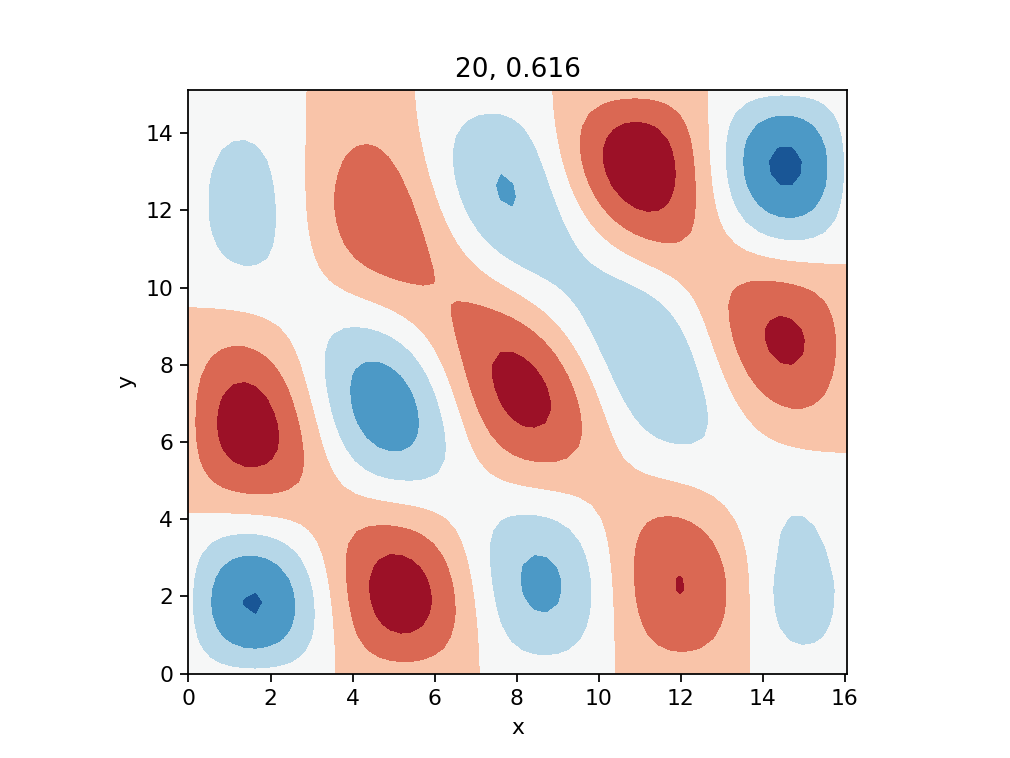

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/contour.py:1503: UnitStrippedWarning:

The unit of the quantity is stripped when downcasting to ndarray.

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/contour.py:1504: UnitStrippedWarning:

The unit of the quantity is stripped when downcasting to ndarray.



<IPython.core.display.Javascript object>


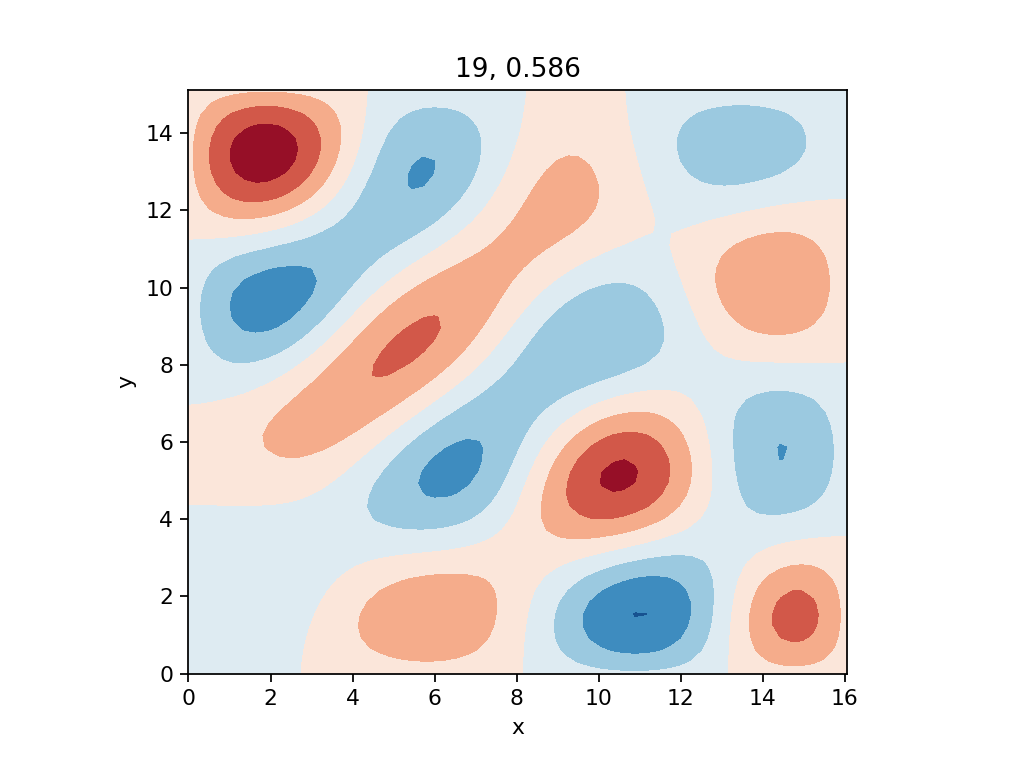

<IPython.core.display.Javascript object>


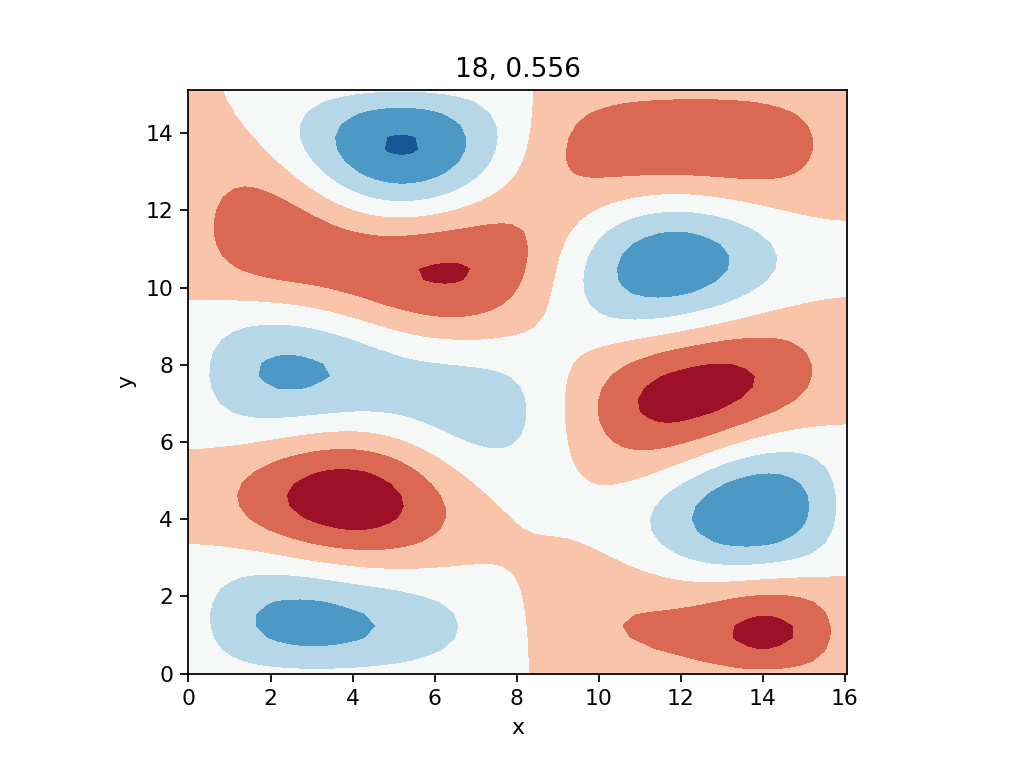

<IPython.core.display.Javascript object>


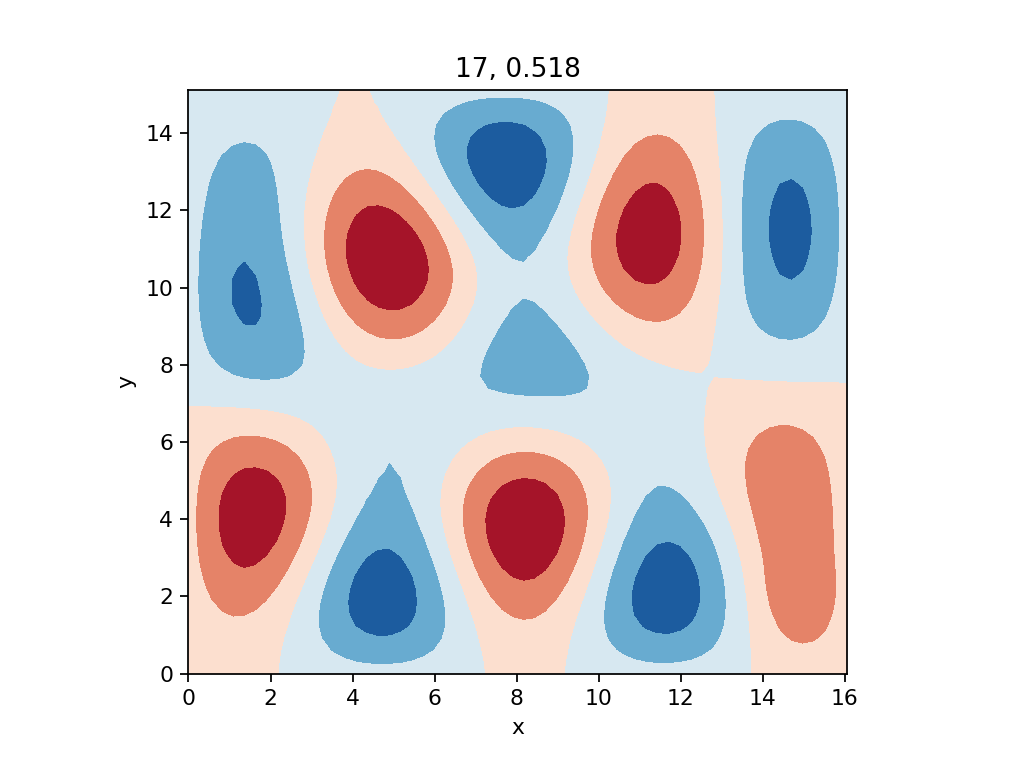

<IPython.core.display.Javascript object>


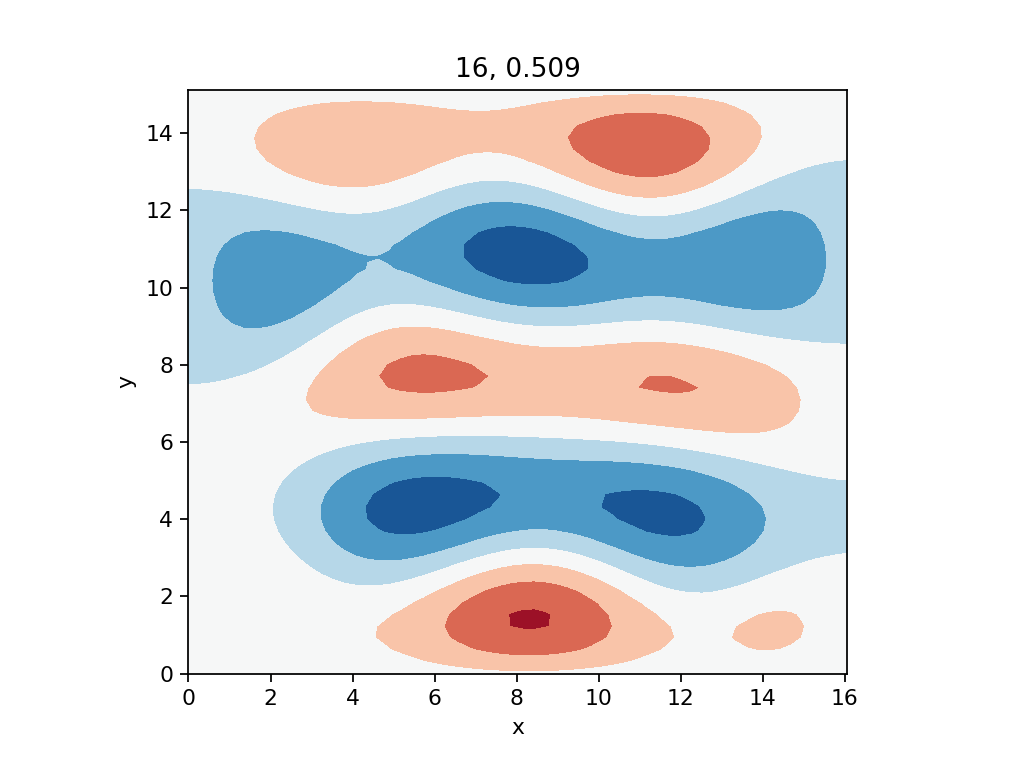

<IPython.core.display.Javascript object>


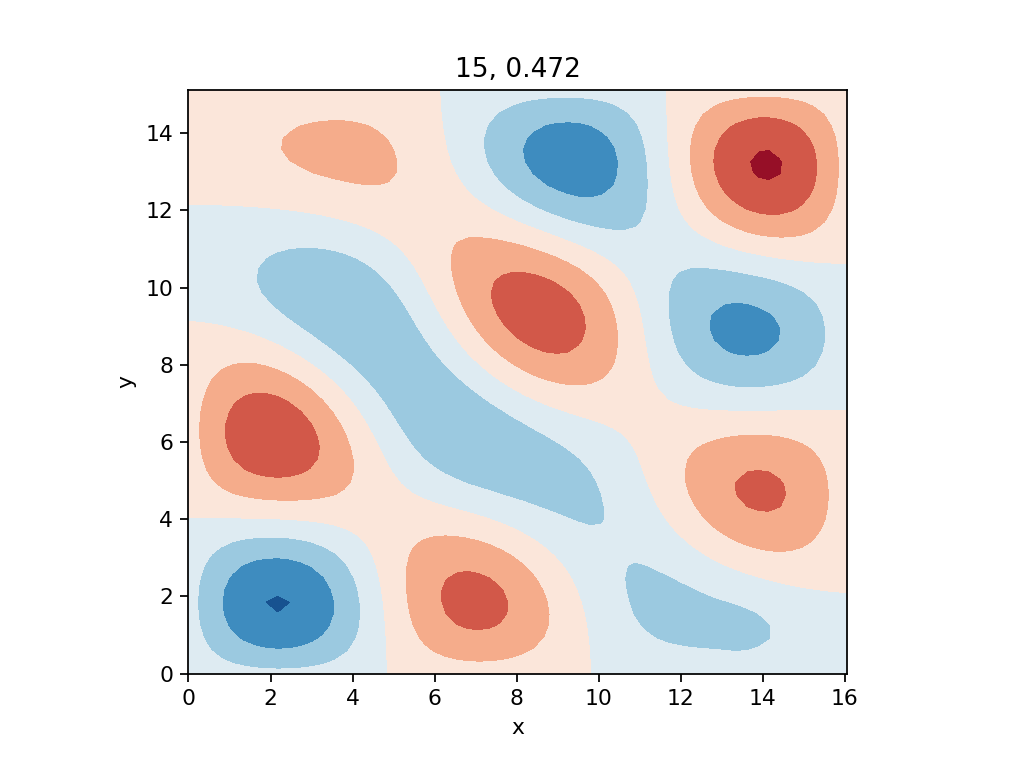

<IPython.core.display.Javascript object>


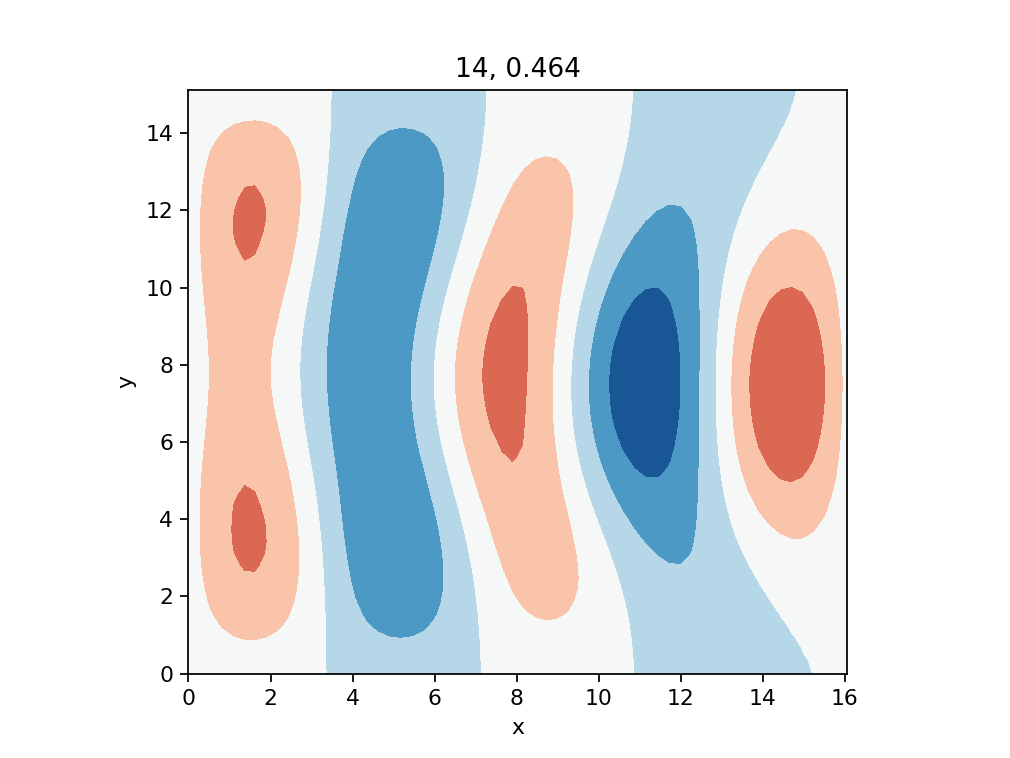

<IPython.core.display.Javascript object>


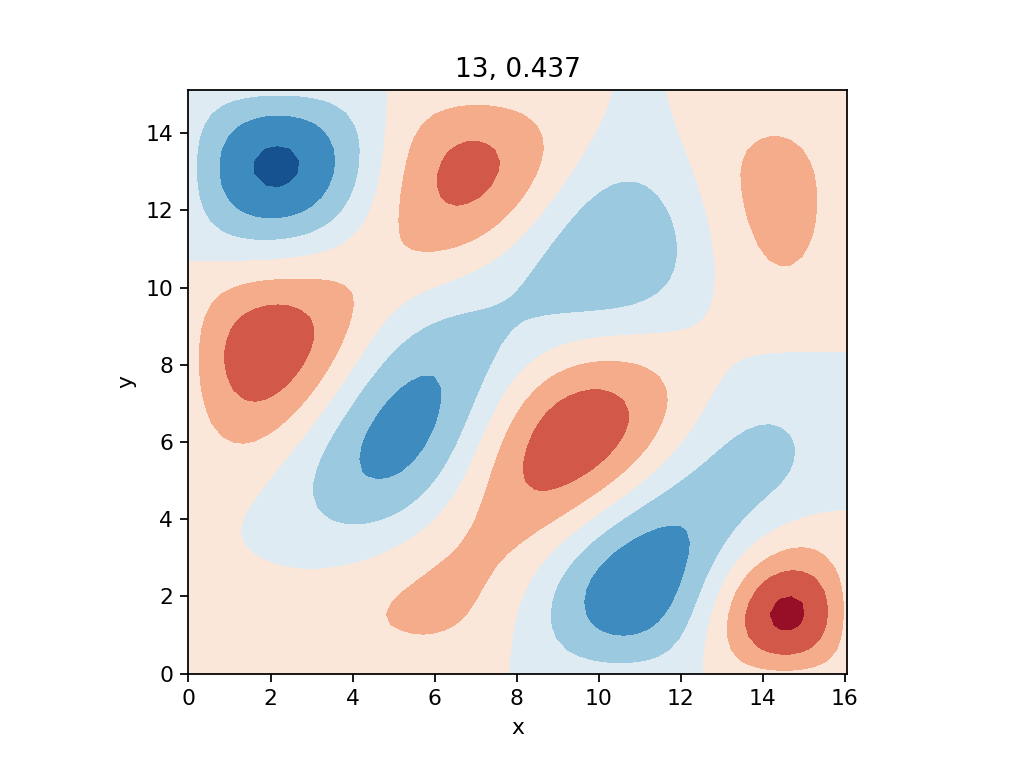

<IPython.core.display.Javascript object>


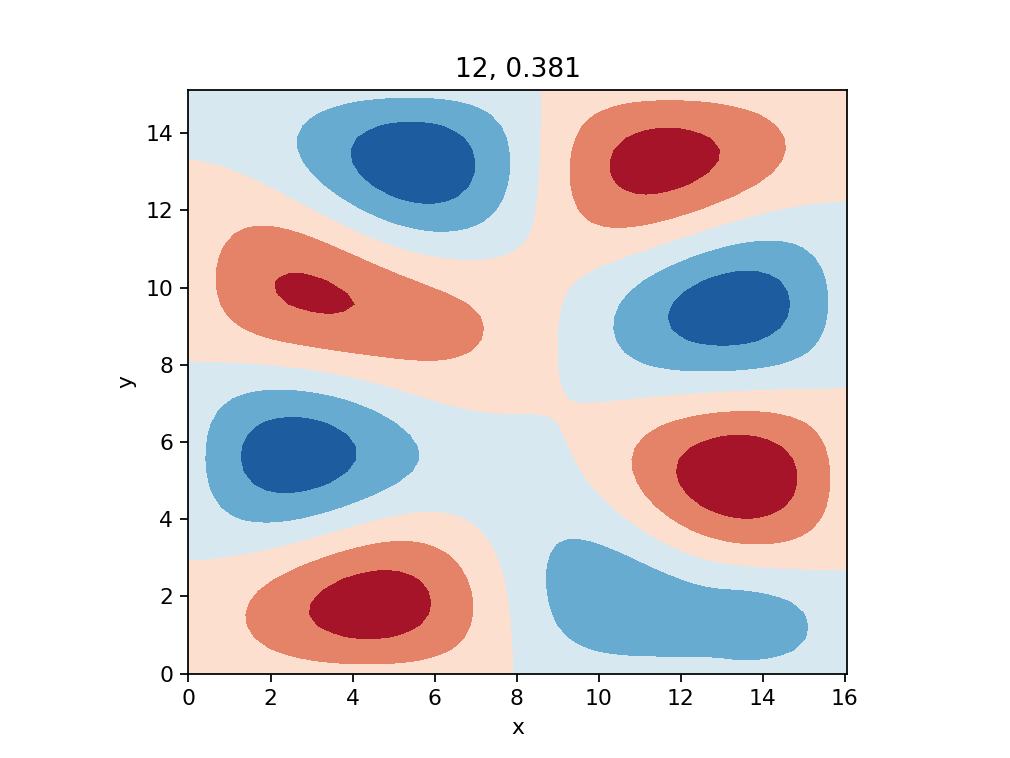

<IPython.core.display.Javascript object>


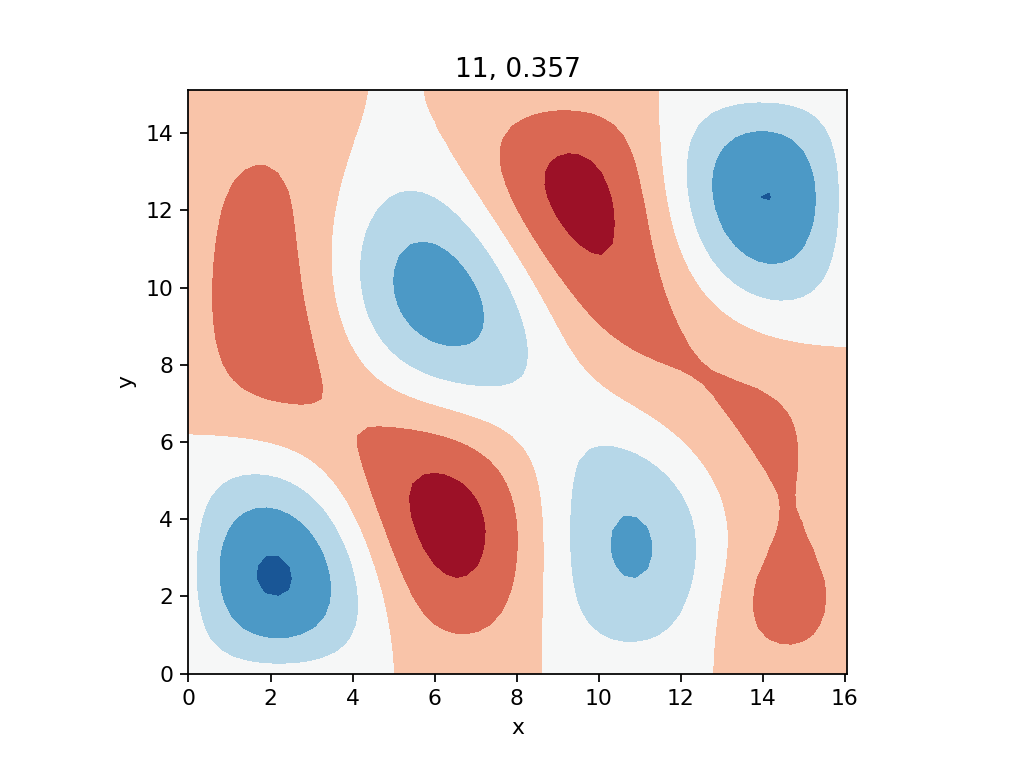

<IPython.core.display.Javascript object>


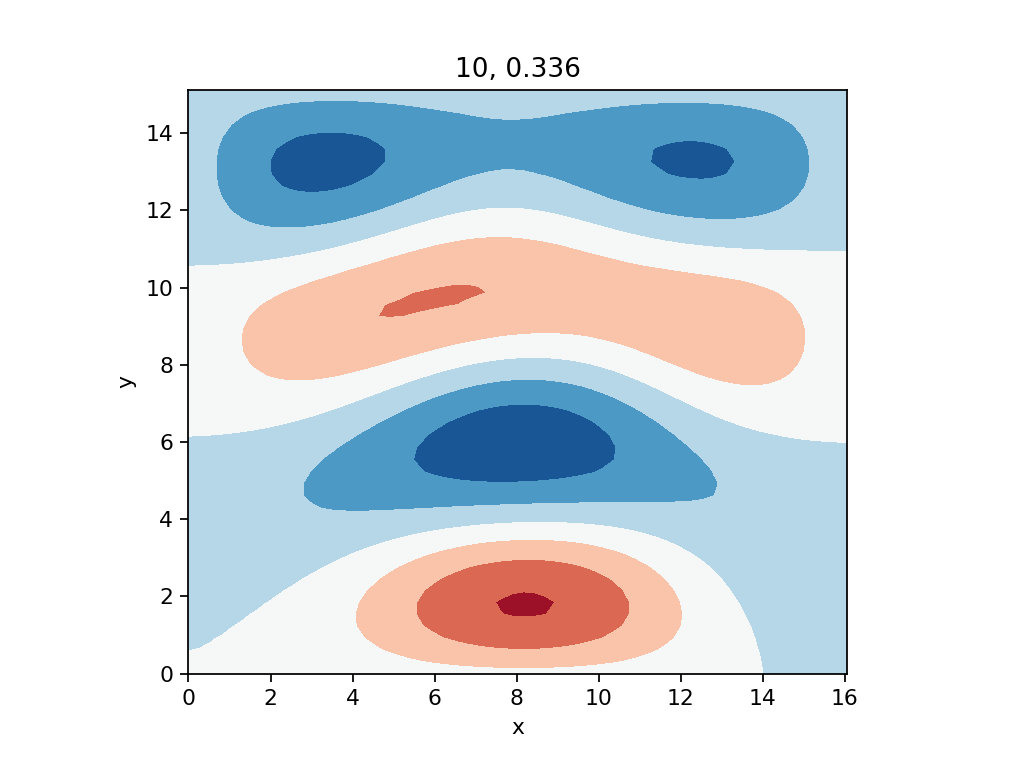

<IPython.core.display.Javascript object>


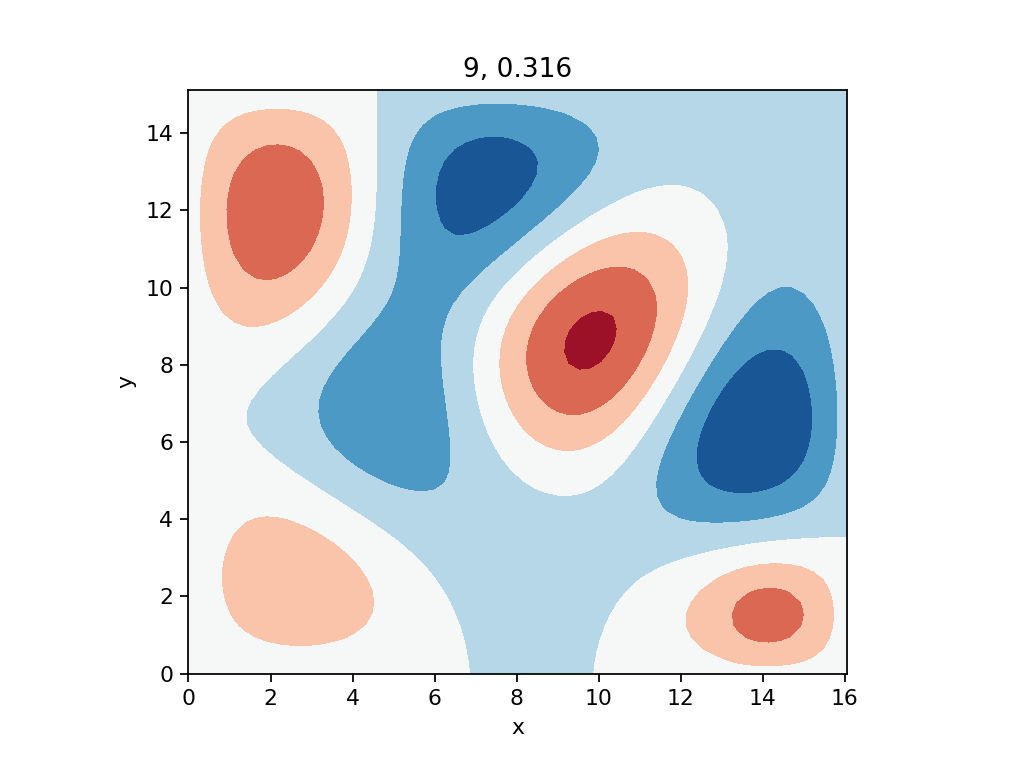

<IPython.core.display.Javascript object>


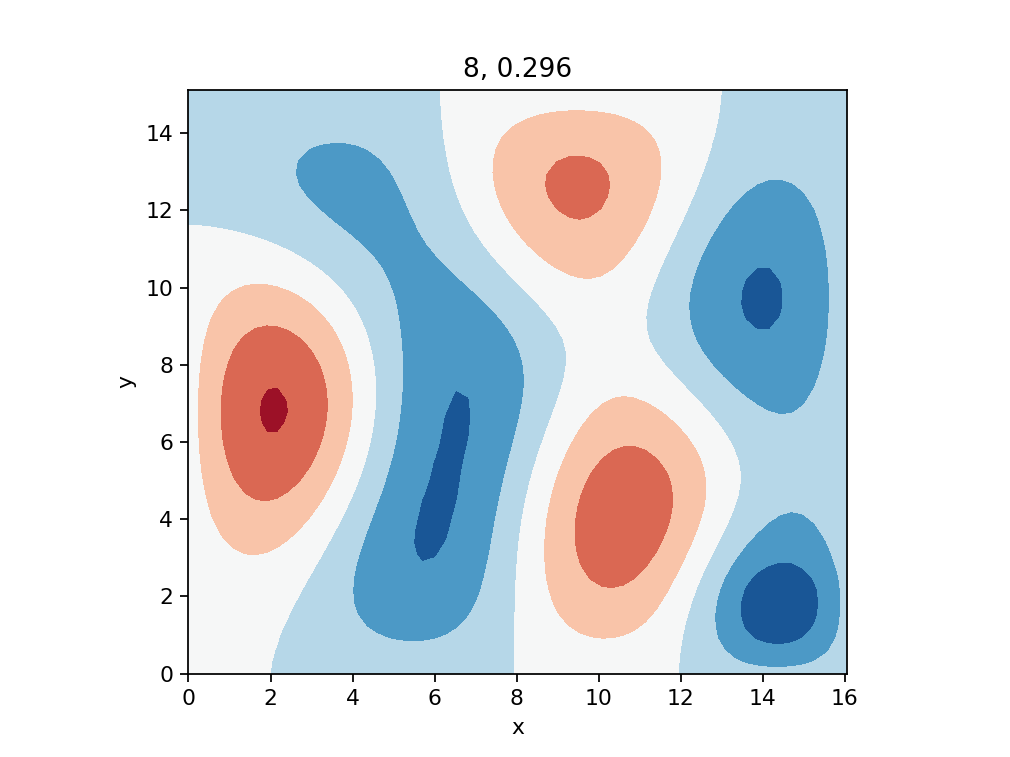

<IPython.core.display.Javascript object>


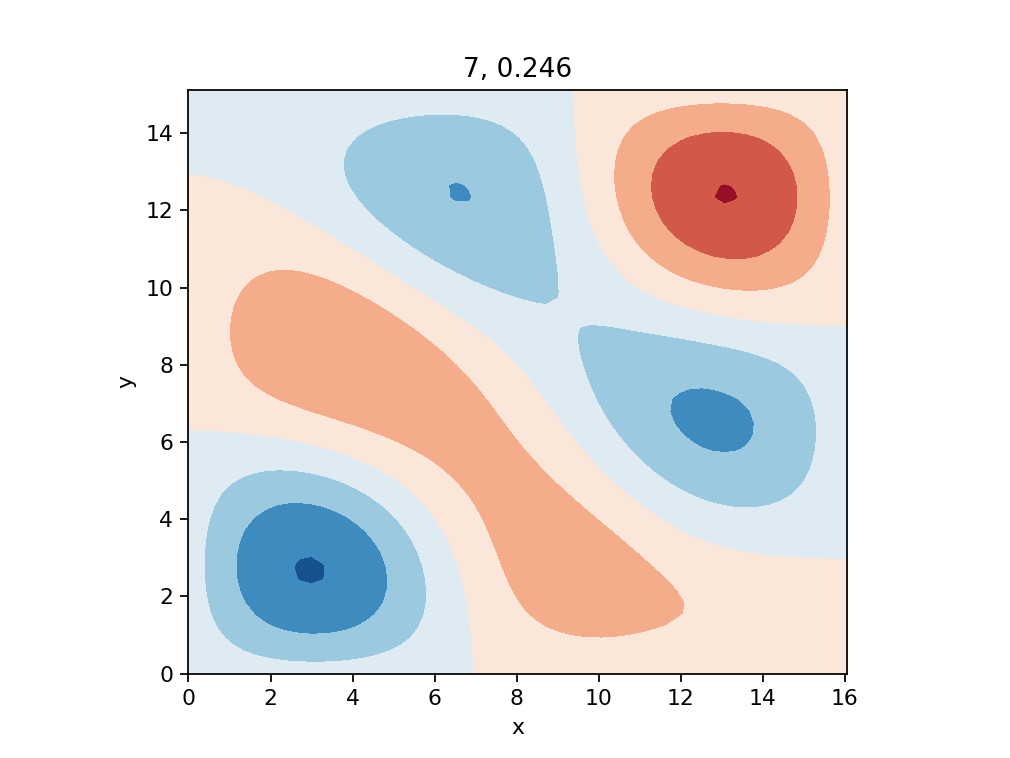

<IPython.core.display.Javascript object>


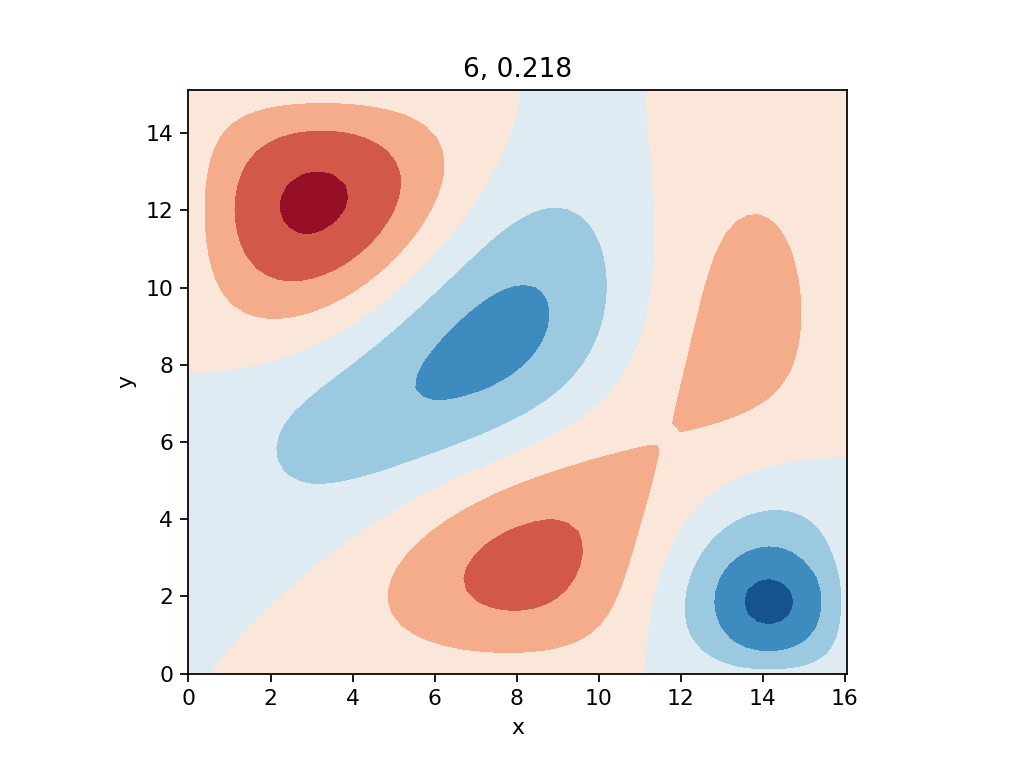

<IPython.core.display.Javascript object>


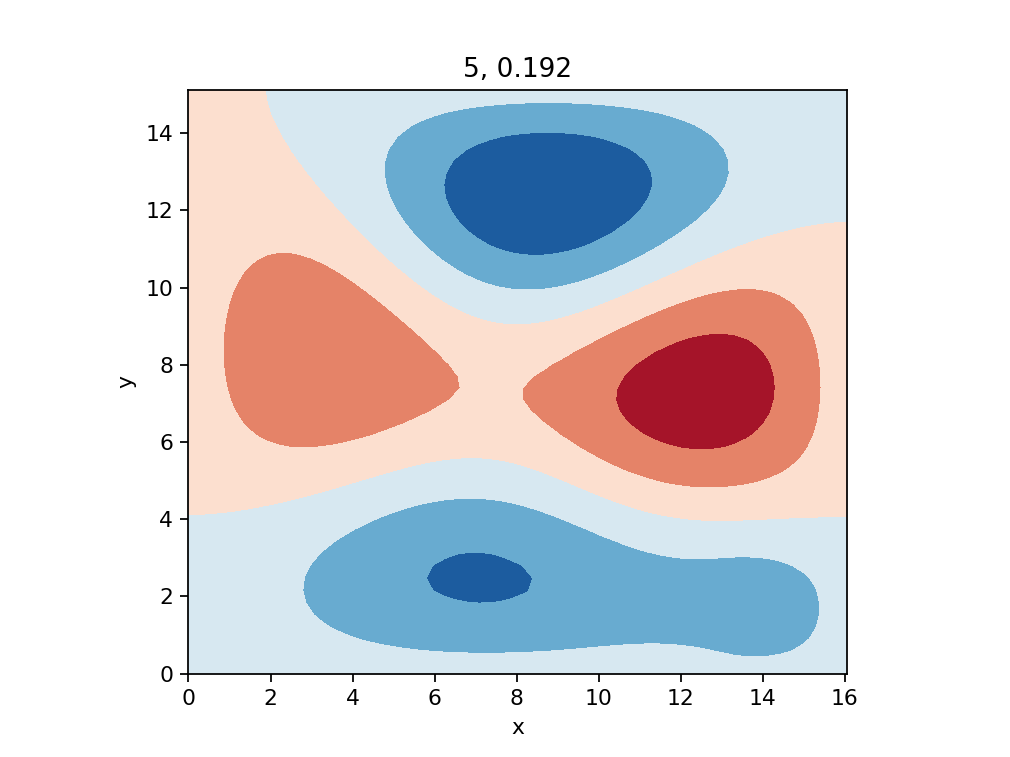

<IPython.core.display.Javascript object>


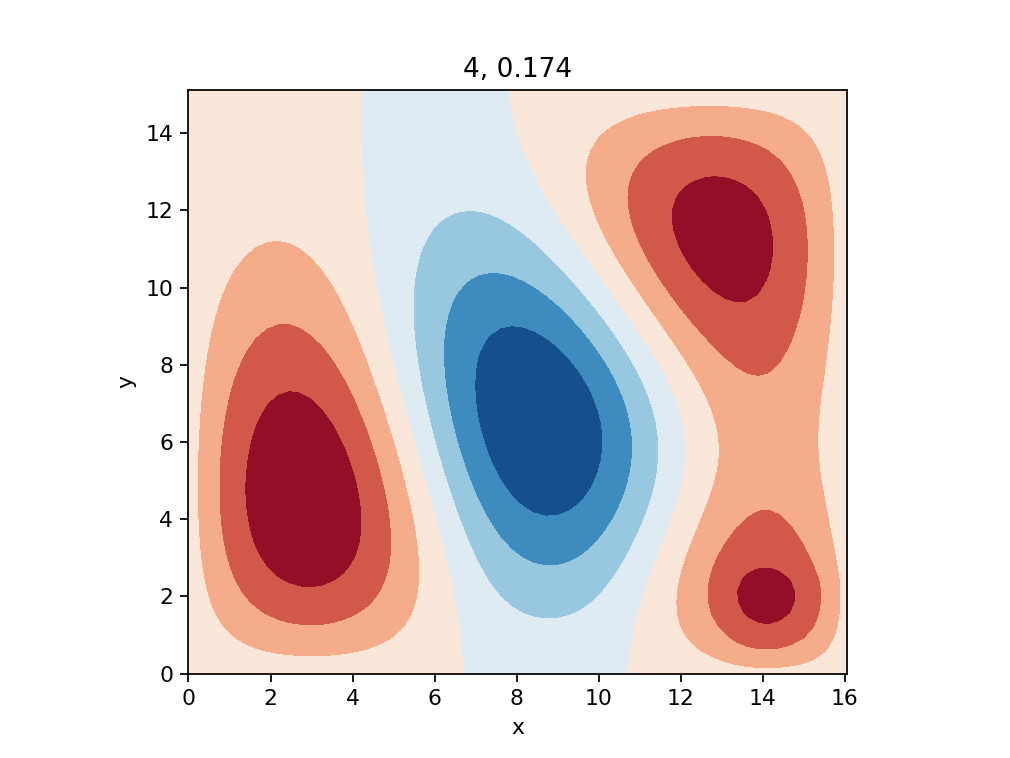

<IPython.core.display.Javascript object>


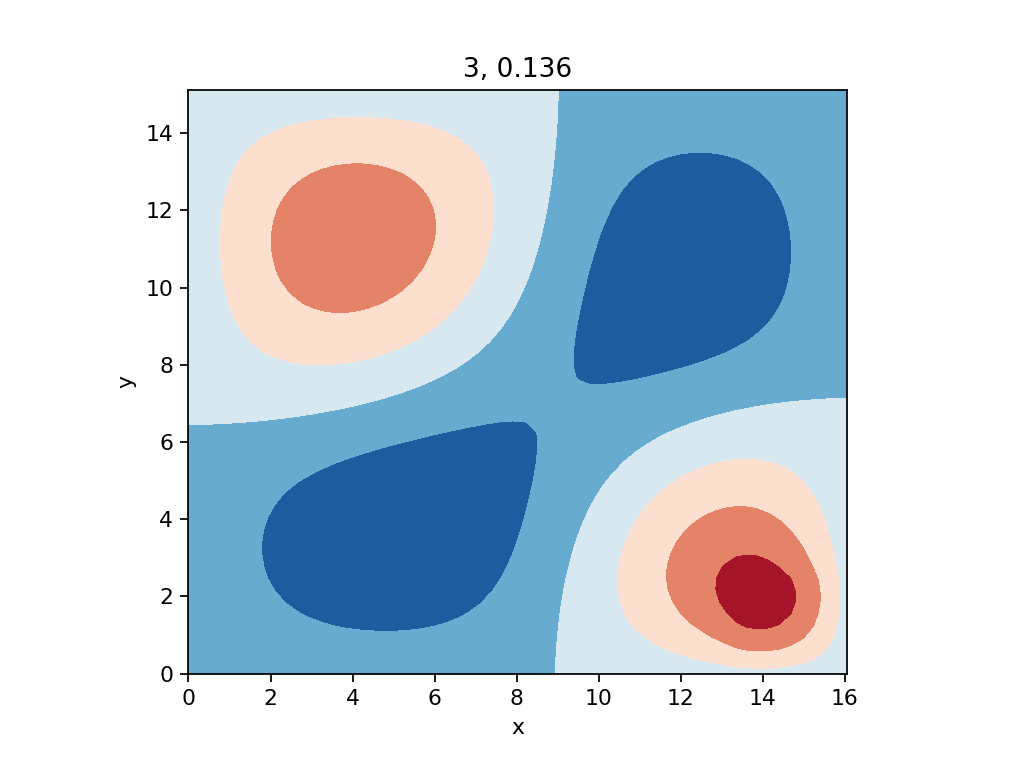

<IPython.core.display.Javascript object>


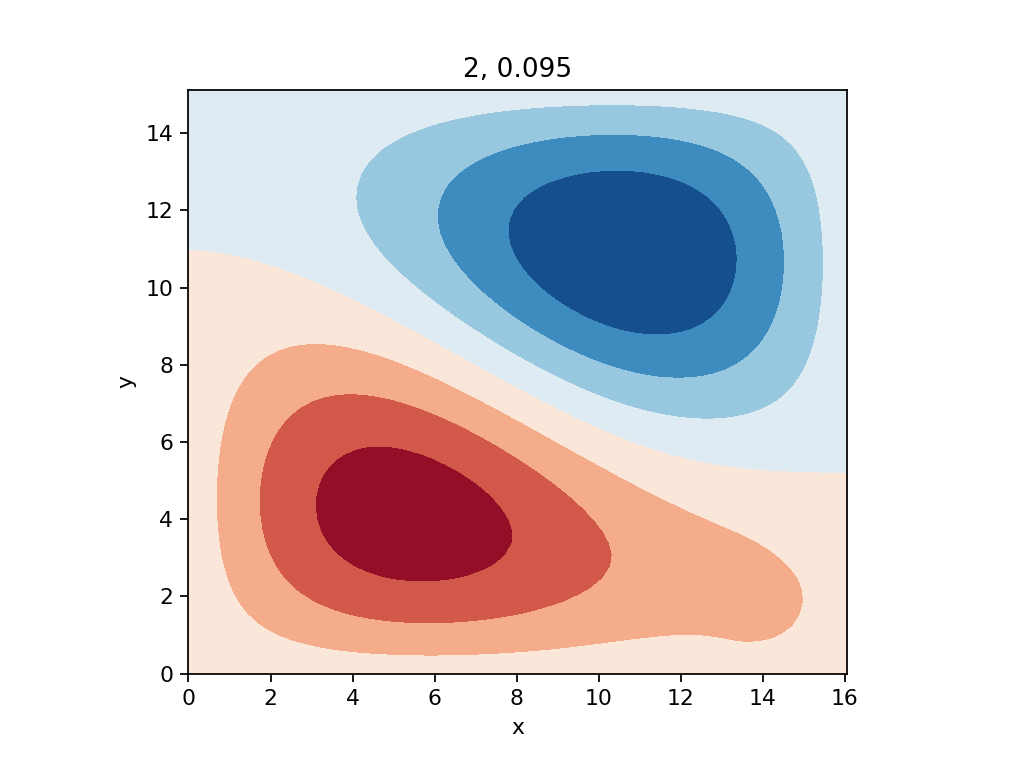

<IPython.core.display.Javascript object>


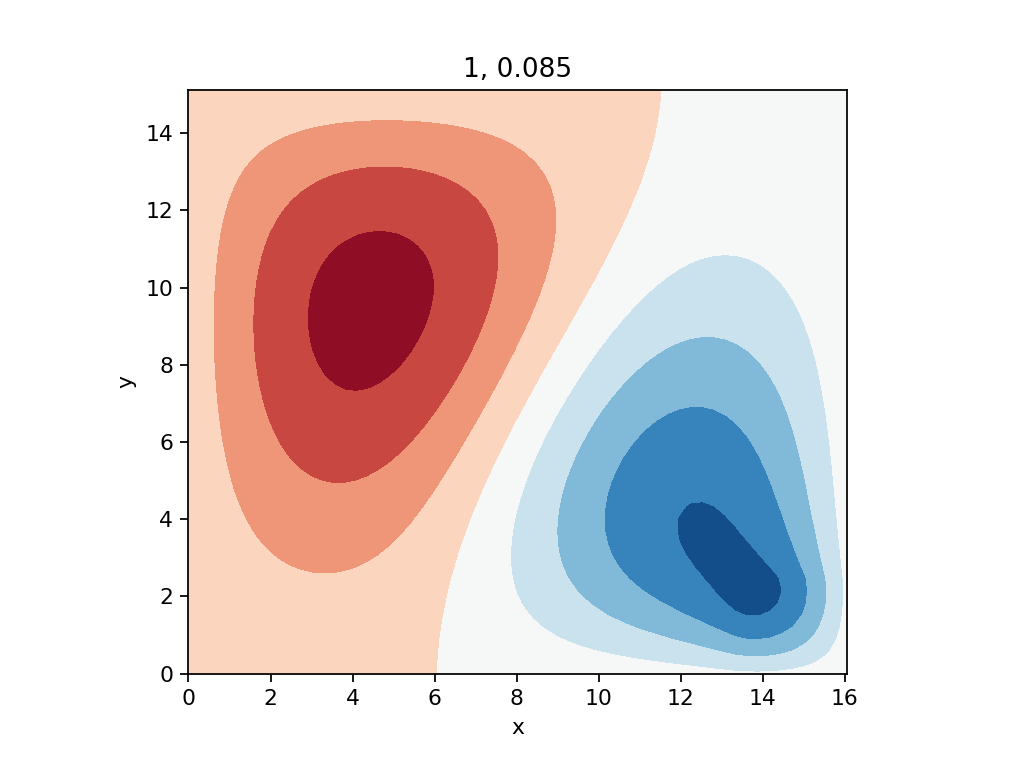

/tmp/ipykernel_21168/2247658769.py:6: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


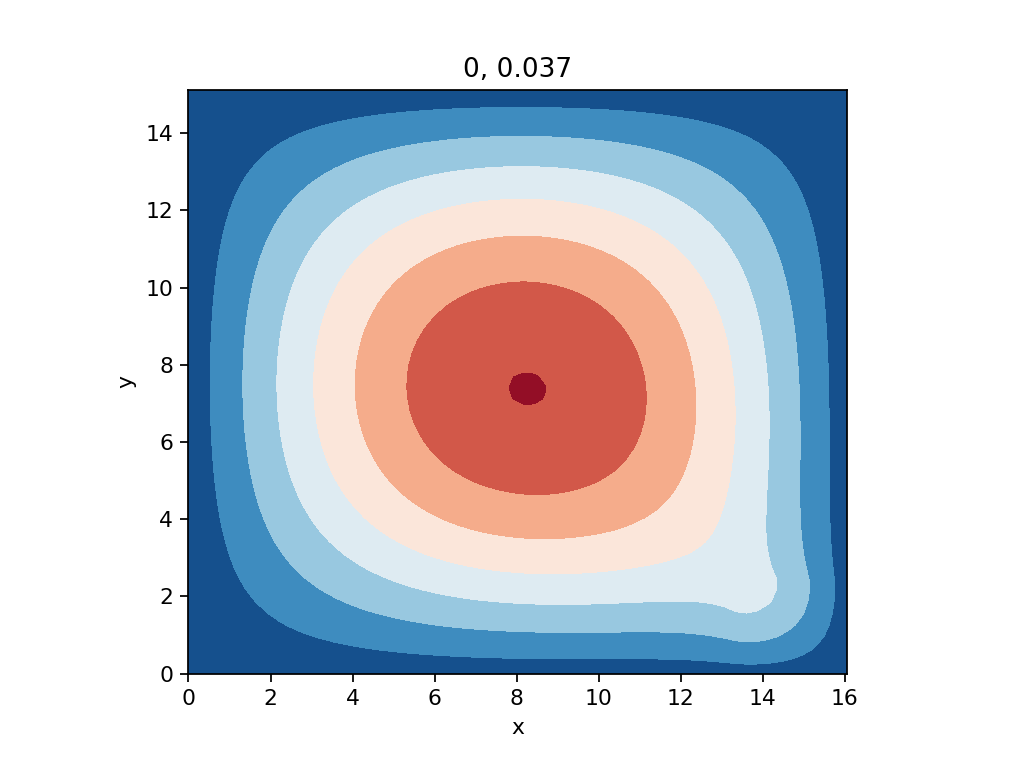

In [11]:
n = 20
for index in range(n,-1,-1):
    Psi_flat = psi[:,index]
    Psi = np.reshape(Psi_flat,[nx,ny]).T
    Psi = np.flipud(Psi) # This is just aesthetic, so the y-coordinate increases from bottom to top
    fig, ax = plt.subplots() 
    ax.contourf(xvec,yvec,Psi,cmap='RdBu')
    plt.title(str(index)+', '+str(round(Epsi[index],3)))
    ax.set_aspect(str(aspect_ratio))
    plt.xlabel('x')
    plt.ylabel('y')

### Spartan comparison
If you haven't already done it, now is a good time to solve the oxygenated graphene system on Spartan$^{TM}$. After you do so, have a look at the resulting orbitals. You'll notice that the $\pi$-type orbitals (which is almost all of them) seem to come in tilted and non-tilted symmetries: this is especially evident in the lowest-energy orbitals.  At higher energies, we start seeing a mix of tilted and non-tilted symmetries.  

Visual inspection of our Python results, shows that there are corresponding states:

- Our #7, looks like tilted 1x4 (similar to Spartan's HOMO-9)
- Our #10, looks like a non-tilted 1x4 (similar to Spartan's HOMO-7.

In the cell below, identify the tilted 1x5 and 2x4 states, both here and in your Spartan results.

### BEGIN SOLUTION

- Spartan's HOMO-5, and our #11, are  tilted 1x5. 
- Spartan's HOMO-4, and our #12, are  tilted 2x4. 

### END SOLUTION

### That one very localized orbital in Spartan
You'll no doubt have noticed that one, very localized orbital in Spartan, HOMO-3. It's reproduced in Fig. 2 here.

<p style='text-align: center;'>
<img src="http://webspace.pugetsound.edu/facultypages/nesh/Notebook/Oxographene with HOMO-3.jpg" height="500" width="500"/>
<p style='text-align: center;'>
<strong>Figure 2</strong>. HOMO-3 of oxygraphene.
</p>

The thing is, this is a $\sigma$-type orbital, so you can't expect to fit it in with the analysis you just did, with the tilted and non-tilted $\pi$-type orbitals. And unfortunately, Spartan shows us just this one $\sigma$-type orbital, so we can't tell how it might fit it into a pattern. 

On the other hand, it's very gratifying to see this localization, even if it's just the one orbital, because it tells us that adding an oxygen to graphene has a pretty whopping big localzing effect on $\sigma$-type orbitals -- much more so, it seems, than it has on $\pi$-type orbitals. Care to hazard a guess as to why that might be? Offer some some thoughts (even wild speculations) in the cell below.

### BEGIN SOLUTION

Maybe it is telling us that the greater electronegativity of oxygen is more about its $\sigma$ orbitals than about its $\pi$ orbitals.

### END SOLUTION

### Refreshing and saving your code
1. Use the dropdown menu Kernel/Restart
2. Use the dropdown menu Cell/Run All Above
3. Under the "File" dropdown menu item in the upper left is a disk icon. Press it now to save your work (you can, do this at any time as you're working on an assignment, actually).

### Validating
This step will help ensure that you didn't miss something (although it's not a guarantee). Find the "Validate" button and press it. If there are any errors or warnings, fix them.

### Finishing up
Assuming all this has gone smoothly, carry out three more steps (but read this carefully before starting):
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page